# Import Python Libraries and Load dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, accuracy_score
import xgboost as xgb

C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)

In [3]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 
              'wage_class'] 
train_set.columns = col_labels
test_set.columns = col_labels

In [4]:
train_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [5]:
test_set.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


# Data Preprocessing
#### Handle Missing data
#### Handle categorical data

In [6]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [7]:
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [8]:
def data_preprocessing(df):
    df.convert_objects(convert_numeric=True)
    df.fillna(0, inplace=True) 
    
    return df


def handle_non_numeric_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            
            x = 0            
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1                    
            df[column] = list(map(convert_to_int, df[column]))
            
    return df

In [9]:
df_train = data_preprocessing(train_set)
df_train = handle_non_numeric_data(train_set)
print(df_train.head(2))

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          6   77516          6             13               1   
1   50          3   83311          6             13               4   

   occupation  relationship  race  sex  capital_gain  capital_loss  \
0           3             5     1    1          2174             0   
1           1             2     1    1             0             0   

   hours_per_week  native_country  wage_class  
0              40              17           0  
1              13              17           0  


In [10]:
df_test = data_preprocessing(test_set)
df_test = handle_non_numeric_data(test_set)
print(df_test.head(2))

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


   age  workclass  fnlwgt  education  education_num  marital_status  \
0   25          5  226802          8              7               1   
1   38          5   89814         11              9               4   

   occupation  relationship  race  sex  capital_gain  capital_loss  \
0           2             3     4    1             0             0   
1           9             2     1    1             0             0   

   hours_per_week  native_country  wage_class  
0              40              17           0  
1              50              17           0  


In [11]:
x_test = df_test.drop(['wage_class'], 1)
y_test = df_test['wage_class']

### Graph between features and target price

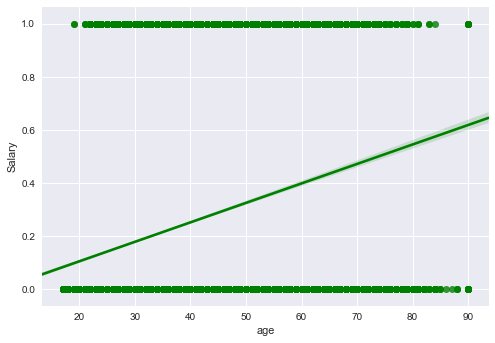

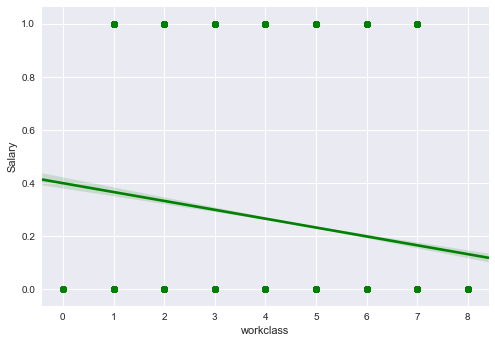

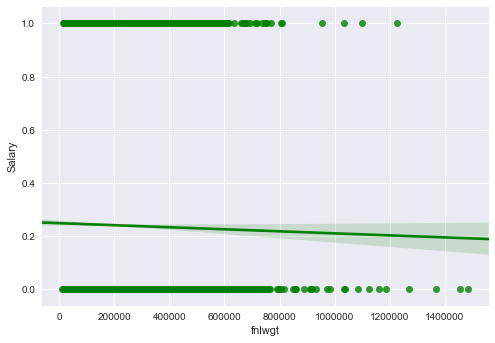

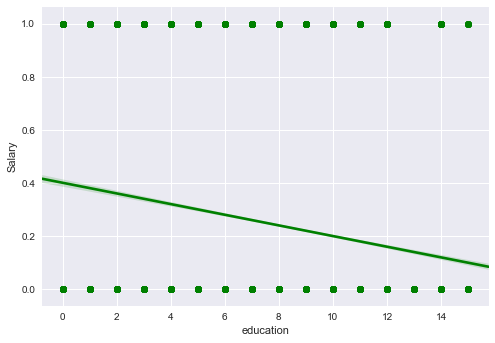

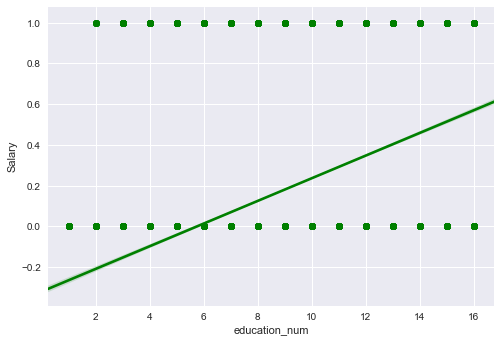

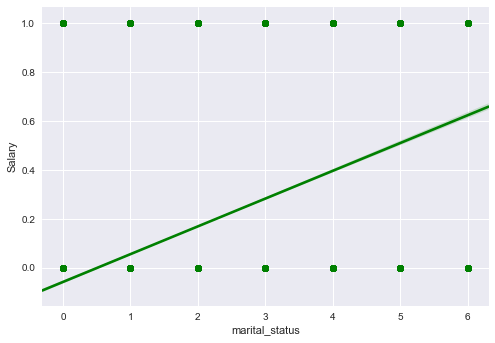

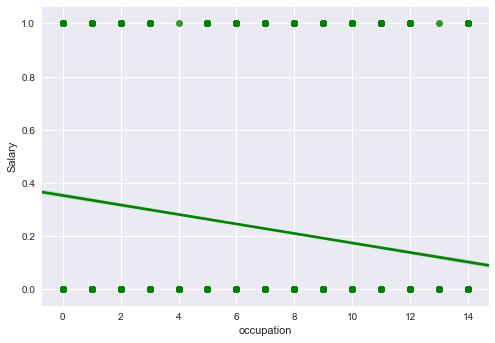

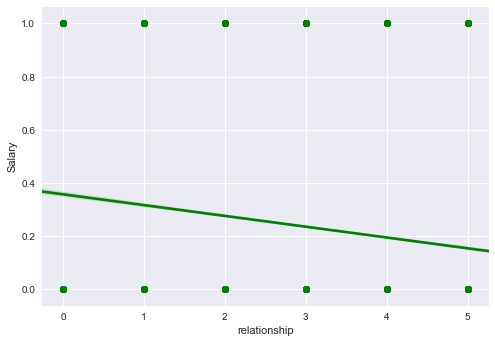

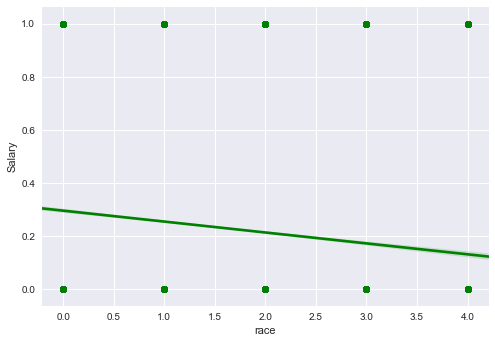

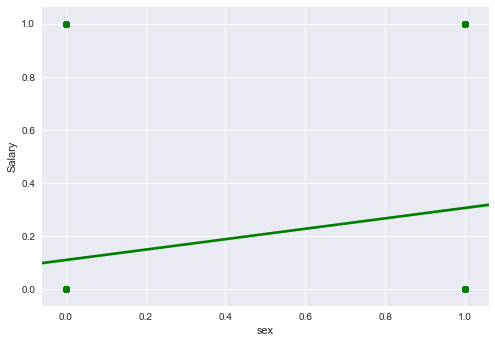

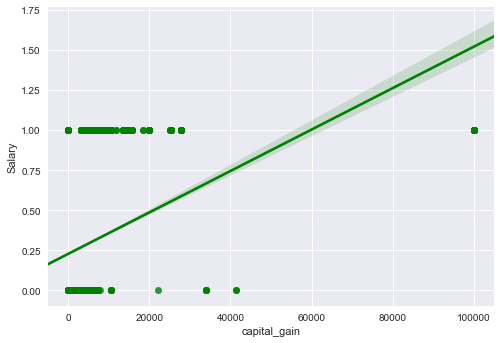

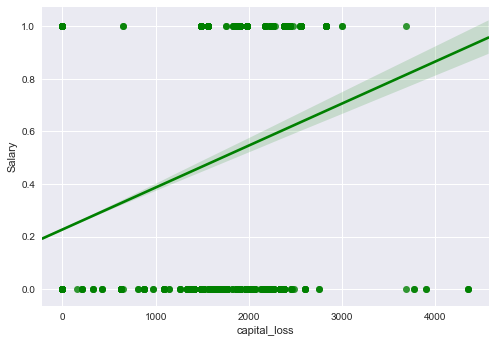

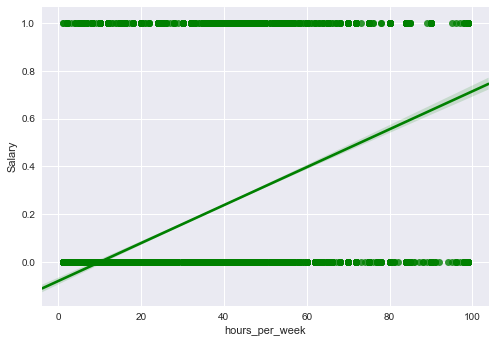

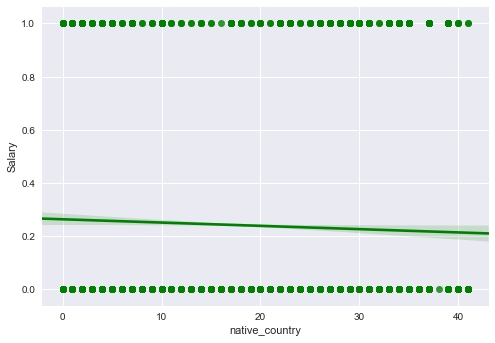

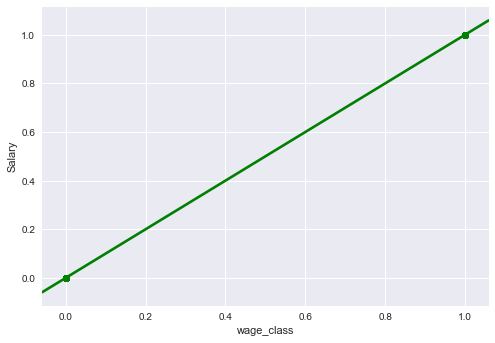

In [12]:
for var in train_set.columns:
    sns.regplot(train_set[var], train_set['wage_class'], color='g')
    plt.ylabel('Salary')
    plt.show()

# split training dataset for cross validation

In [13]:
df_x = df_train.drop(['wage_class'], 1)
df_y = df_train['wage_class']

In [14]:
x_train,x_cv,y_train,y_cv = train_test_split(df_x,df_y,test_size=0.2,random_state=5)

In [15]:
models = pd.DataFrame(index=['train_mse','cv_mse','test_mse','accuracy_score'], columns=['XGBOOST Classifier 1','XGBOOST Classifier 2','XGBOOST Classifier 3','XGBOOST Classifier 4'])

## Apply Model and calculate error/accuracy

#### Boosting (XGBOOST Classifier with different-2 input parameters - n_estimators & learning_rate)

In [16]:
Boosting_Cls1 = xgb.XGBClassifier(n_estimators=150,learning_rate=1)
Boosting_Cls1.fit(df_x,df_y)
models.loc['train_mse','XGBOOST Classifier 1'] = mean_squared_error(y_pred=Boosting_Cls1.predict(x_train).round(), y_true=y_train)
models.loc['cv_mse','XGBOOST Classifier 1'] = mean_squared_error(y_pred=Boosting_Cls1.predict(x_cv).round(), y_true=y_cv)
models.loc['test_mse','XGBOOST Classifier 1'] = mean_squared_error(y_pred=Boosting_Cls1.predict(x_test).round(), y_true=y_test)
models.loc['accuracy_score','XGBOOST Classifier 1'] = accuracy_score(y_pred=Boosting_Cls1.predict(x_test).round(), y_true=y_test)

In [17]:
Boosting_Cls2 = xgb.XGBClassifier(n_estimators=150,learning_rate=0.001)
Boosting_Cls2.fit(df_x,df_y)
models.loc['train_mse','XGBOOST Classifier 2'] = mean_squared_error(y_pred=Boosting_Cls2.predict(x_train).round(), y_true=y_train)
models.loc['cv_mse','XGBOOST Classifier 2'] = mean_squared_error(y_pred=Boosting_Cls2.predict(x_cv).round(), y_true=y_cv)
models.loc['test_mse','XGBOOST Classifier 2'] = mean_squared_error(y_pred=Boosting_Cls2.predict(x_test).round(), y_true=y_test)
models.loc['accuracy_score','XGBOOST Classifier 2'] = accuracy_score(y_pred=Boosting_Cls2.predict(x_test).round(), y_true=y_test)

In [18]:
Boosting_Cls3 = xgb.XGBClassifier(n_estimators=10,learning_rate=1)
Boosting_Cls3.fit(df_x,df_y)
models.loc['train_mse','XGBOOST Classifier 3'] = mean_squared_error(y_pred=Boosting_Cls3.predict(x_train).round(), y_true=y_train)
models.loc['cv_mse','XGBOOST Classifier 3'] = mean_squared_error(y_pred=Boosting_Cls3.predict(x_cv).round(), y_true=y_cv)
models.loc['test_mse','XGBOOST Classifier 3'] = mean_squared_error(y_pred=Boosting_Cls3.predict(x_test).round(), y_true=y_test)
models.loc['accuracy_score','XGBOOST Classifier 3'] = accuracy_score(y_pred=Boosting_Cls3.predict(x_test).round(), y_true=y_test)

In [19]:
Boosting_Cls4 = xgb.XGBClassifier(n_estimators=10,learning_rate=0.001)
Boosting_Cls4.fit(df_x,df_y)
models.loc['train_mse','XGBOOST Classifier 4'] = mean_squared_error(y_pred=Boosting_Cls4.predict(x_train).round(), y_true=y_train)
models.loc['cv_mse','XGBOOST Classifier 4'] = mean_squared_error(y_pred=Boosting_Cls4.predict(x_cv).round(), y_true=y_cv)
models.loc['test_mse','XGBOOST Classifier 4'] = mean_squared_error(y_pred=Boosting_Cls4.predict(x_test).round(), y_true=y_test)
models.loc['accuracy_score','XGBOOST Classifier 4'] = accuracy_score(y_pred=Boosting_Cls4.predict(x_test).round(), y_true=y_test)

## Analyze mse error and accuracy score

In [20]:
models

,XGBOOST Classifier 1,XGBOOST Classifier 2,XGBOOST Classifier 3,XGBOOST Classifier 4
train_mse,0.102695,0.158745,0.138437,0.158745
cv_mse,0.102871,0.156763,0.138032,0.156763
test_mse,0.137031,0.157546,0.14434,0.157546
accuracy_score,0.862969,0.842454,0.85566,0.842454
